In [1]:
from sklearn.linear_model import LinearRegression
import torch
import random

import utils.plotting as plotting
import utils.utils as utils
from utils.data_loaders import get_wake_datasets
from utils.evaluation import evaluate_model

In [2]:
FACTORS_FOLDER = "discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01"
DATA_FOLDER = f"data/{FACTORS_FOLDER}/"
#INPUT_VAR_TO_TRAIN_REDUCTION_FACTOR = {'ti': 4, 'ct': 4}
#train_reduc_factor_string = "training_factors=" + "-".join([f"{k}{v}" for k, v in INPUT_VAR_TO_TRAIN_REDUCTION_FACTOR.items()])
INPUT_VAR_TO_TRAIN_RANGES = {'ti': [(0.15, 0.4)], 'ct': [(0.3, 0.7)]}
train_range_string = "training_ranges=" + '-'.join([f"{var}{r[0]}-{r[1]}" for var, ranges in INPUT_VAR_TO_TRAIN_RANGES.items() for r in ranges])
MODEL_NAME = f"univariate_LR_{train_range_string}" #TODO make the name represent the structure or the parameters of the model
#BEST_MODEL_PATH = f"saved_models/{FACTORS_FOLDER}/{MODEL_NAME}.pt"

CONSIDER_WS = False
COORDS_AS_INPUT = True #univariate

if CONSIDER_WS:
    MODEL_NAME += "_consider_ws"
MODEL_DESCRIPTION=MODEL_NAME+"_"+FACTORS_FOLDER
print(MODEL_DESCRIPTION)

univariate_LR_training_ranges=ti0.15-0.4-ct0.3-0.7_discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01


In [3]:
valid_dataset = None
train_dataset, valid_dataset, test_dataset = get_wake_datasets(DATA_FOLDER,
                                                consider_ws=CONSIDER_WS,
                                                coords_as_input=COORDS_AS_INPUT,
                                                #train_perc=0.7,
                                                #test_perc=0.3,
                                                #validation_perc=0
                                                input_var_to_train_ranges=INPUT_VAR_TO_TRAIN_RANGES)
train_x, train_y = train_dataset.inputs, train_dataset.outputs
test_x, test_y = test_dataset.inputs, test_dataset.outputs
print("Train shapes: ", train_x.shape, train_y.shape)
print("Test shapes: ", test_x.shape, test_y.shape)

if valid_dataset is not None:
    valid_x, valid_y = valid_dataset.inputs, valid_dataset.outputs
    print("Valid shapes: ", valid_x.shape, valid_y.shape)

/Users/niccolomorabito/Library/CloudStorage/GoogleDrive-morabito.1808746@studenti.uniroma1.it/My Drive/BDMA/Semester4 Thesis/Ainslie-surrogate/utils/data_loaders.py:241: UserWarning: 
Ignoring percentages of train-valid-test split (train_perc=0.8, valid_perc=0, test_perc=0.2)
and using the following ranges for the training set instead:
{'ti': [(0.15, 0.4)], 'ct': [(0.3, 0.7)]}
  warnings.warn(


Train shapes:  torch.Size([7347200, 4]) torch.Size([7347200, 1])
Test shapes:  torch.Size([27145216, 4]) torch.Size([27145216, 1])
Valid shapes:  torch.Size([27152384, 4]) torch.Size([27152384, 1])


# Training

In [4]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

# Evaluation and testing

In [5]:
# evaluation on trainset
evaluate_model(model, data=(train_x, train_y), data_type='train',
               model_description=MODEL_DESCRIPTION,
               save_results=True)

print("\n")

# evalution on testset
evaluate_model(model, data=(test_x, test_y), data_type='test',
               model_description=MODEL_DESCRIPTION,
               save_results=True)

Train results for univariate_LR_training_ranges=ti0.15-0.4-ct0.3-0.7_discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01
r2_score=0.169023345270211
explained_variance_score=0.16902410984039307
mean_squared_error=0.0007550971931777894
mean_absolute_error=0.01451148372143507
median_absolute_error=0.0073856692761182785
mean_absolute_percentage_error=1057.4000244140625
Prediction time=5.730911310541505e-09s


Test results for univariate_LR_training_ranges=ti0.15-0.4-ct0.3-0.7_discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01
r2_score=0.16768042136051453
explained_variance_score=0.1708965301513672
mean_squared_error=0.0009576064185239375
mean_absolute_error=0.015174491330981255
median_absolute_error=0.008438864722847939
mean_absolute_percentage_error=1523061096448.0
Prediction time=6.28704219419093e-09s


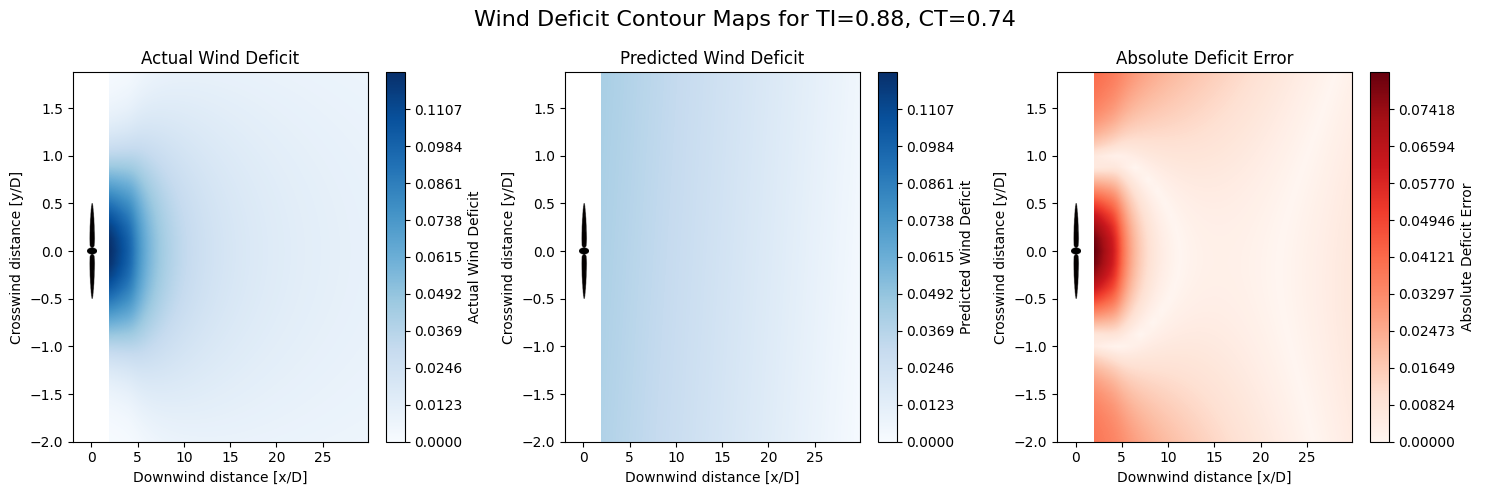

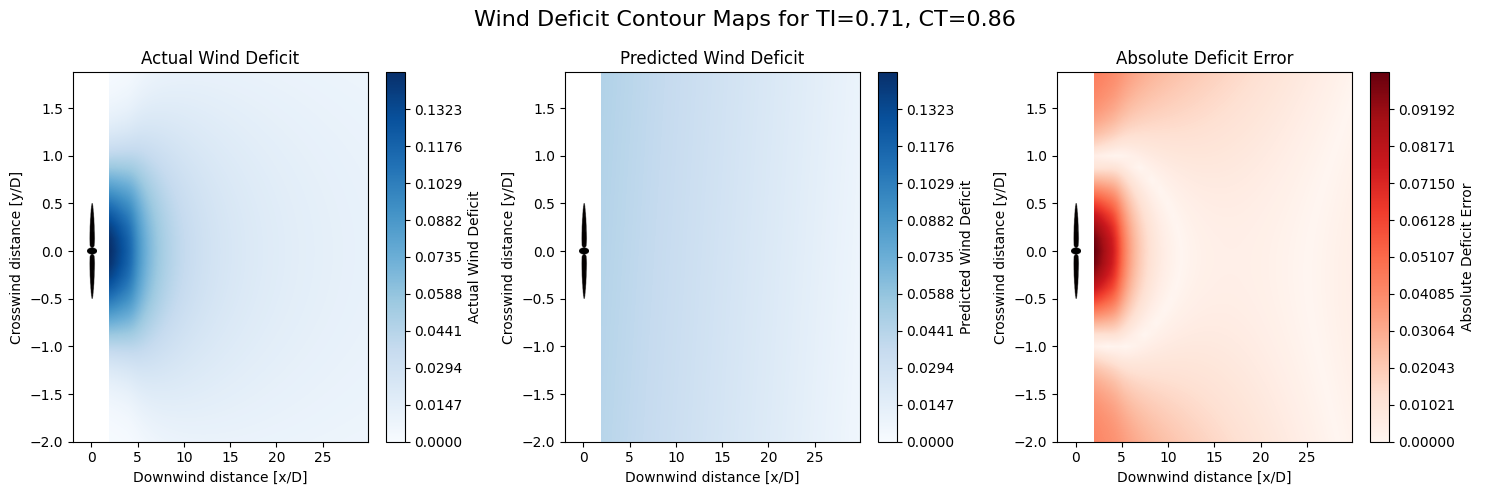

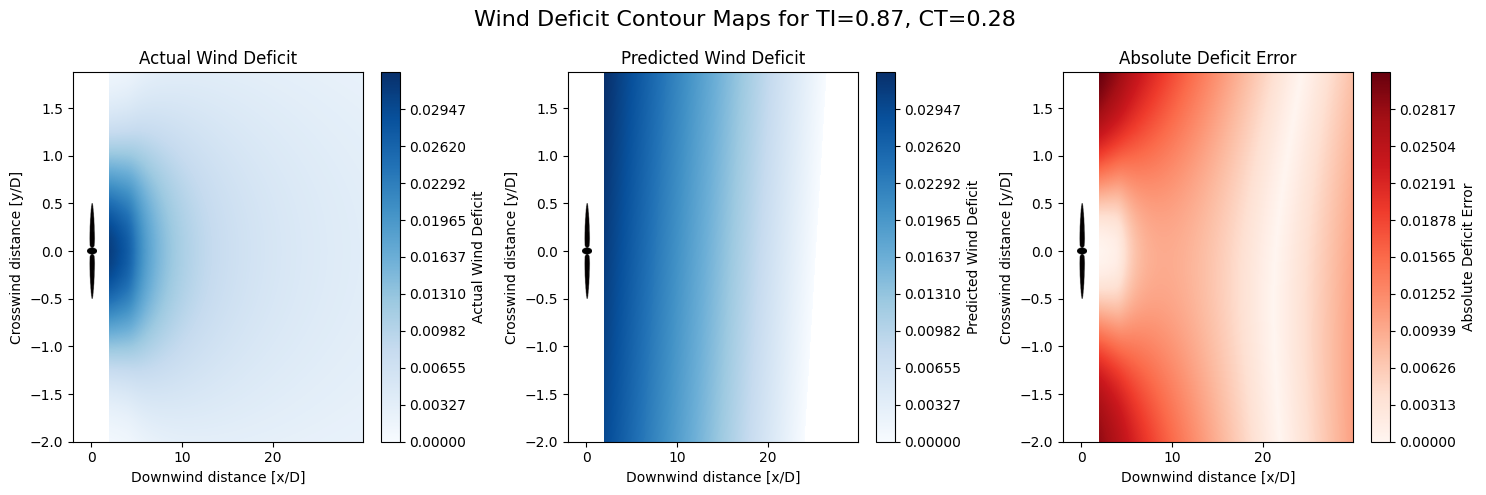

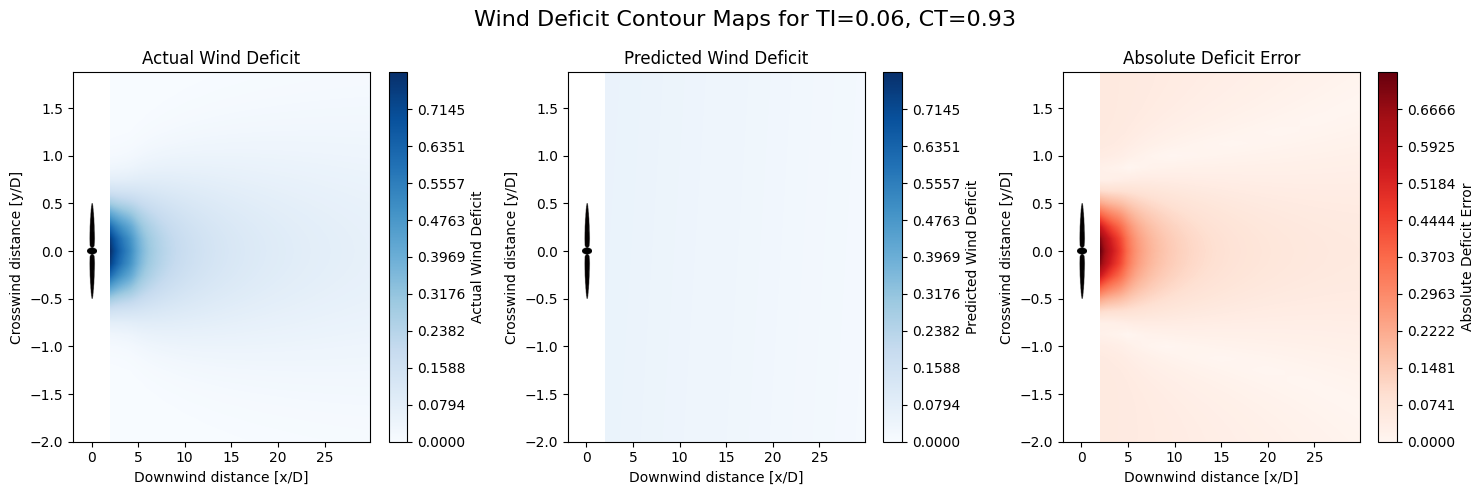

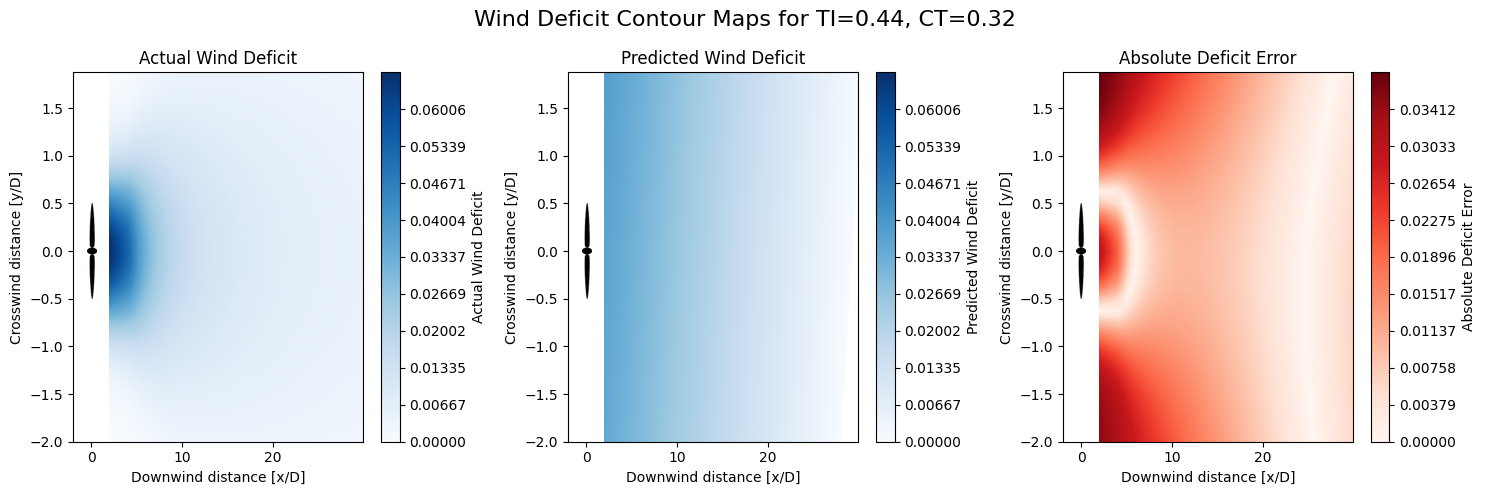

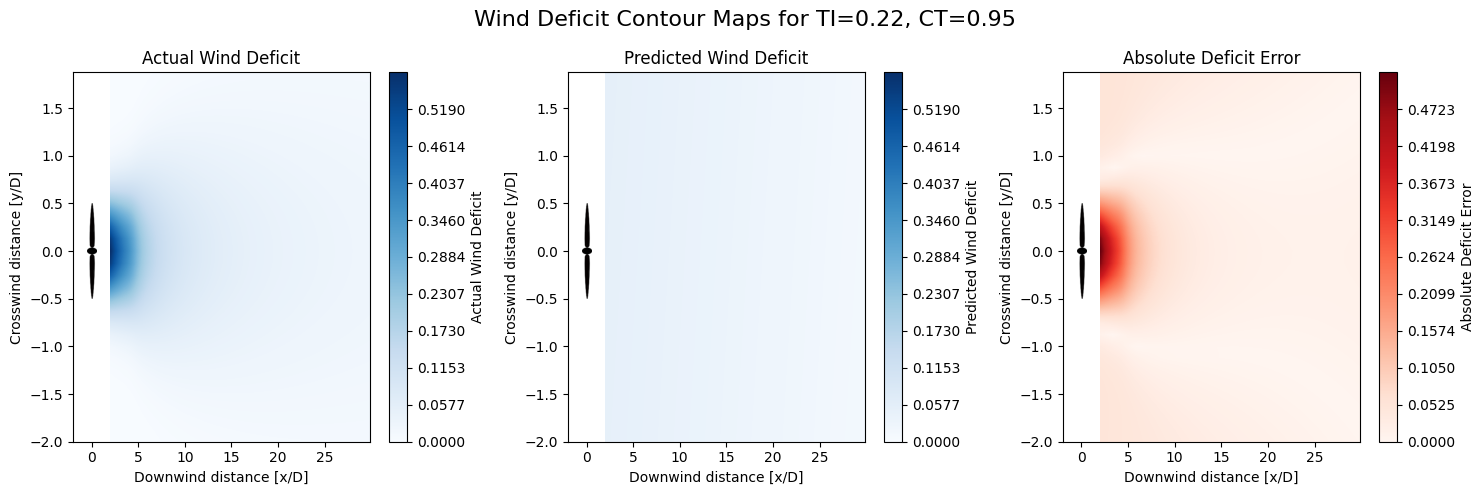

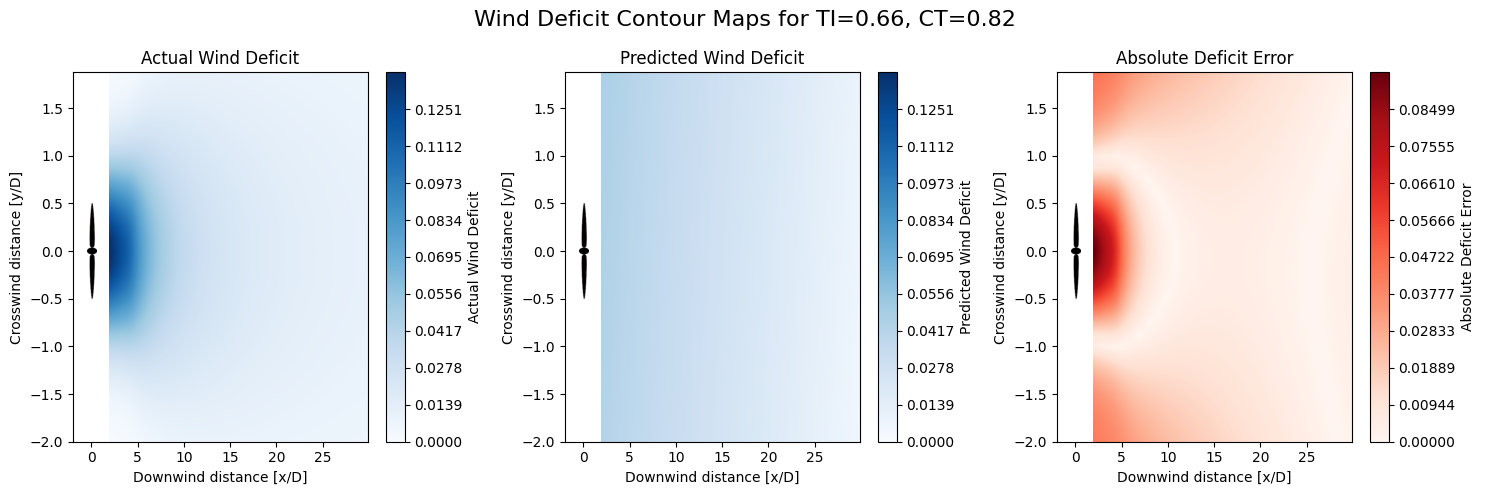

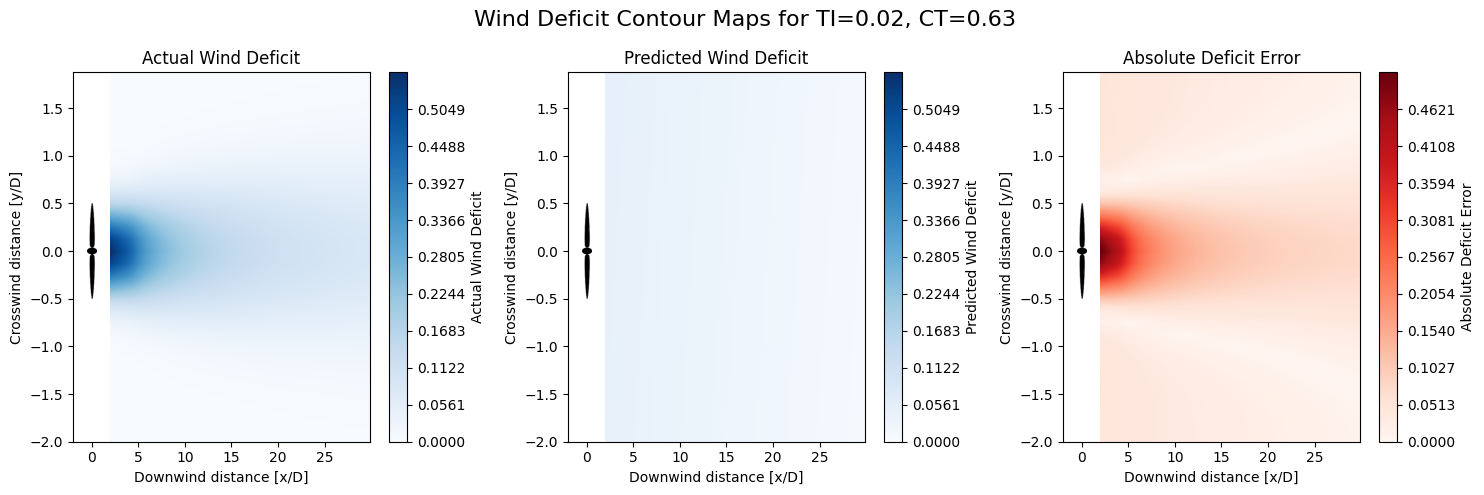

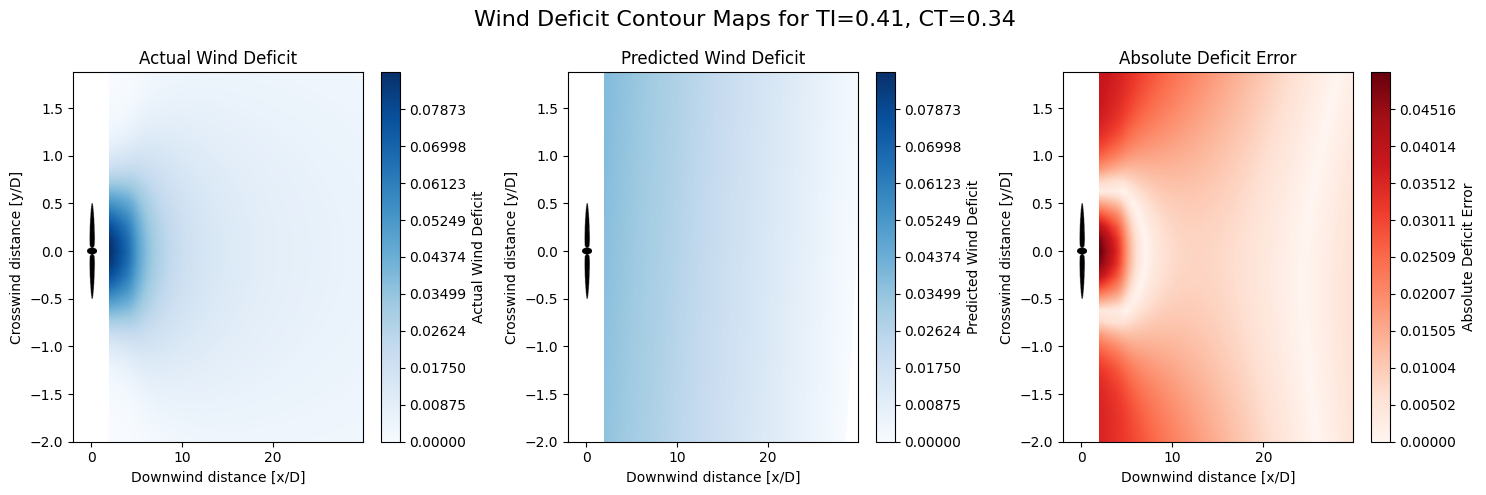

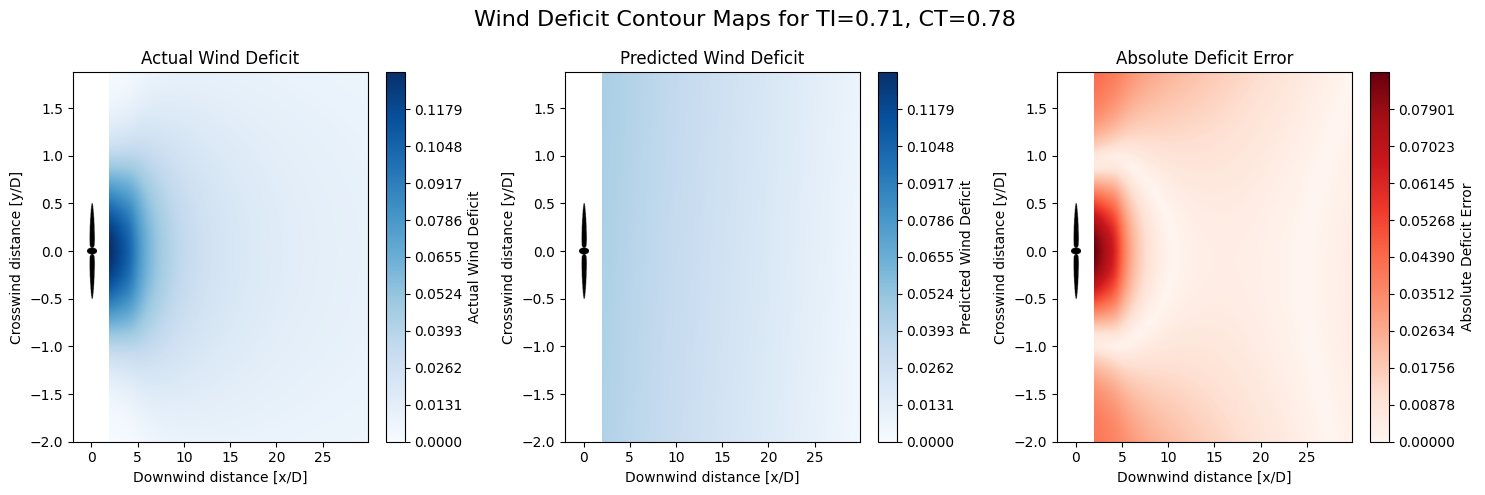

In [6]:
num_cells = test_dataset.num_cells
num_fields = len(test_dataset)//num_cells
field_indices = list(range(num_fields))
random.shuffle(field_indices)

with torch.no_grad():
    for field_idx in field_indices[:10]:
        ti, ct, ws, wake_field, predicted_wake_field = test_dataset.get_parameters_for_plotting_univariate(model, field_idx)
        plotting.plot_maps(test_dataset.X_grid, test_dataset.Y_grid, wake_field, predicted_wake_field, ti, ct, ws, error_to_plot='absolute')